In [1]:
# Built-in imports
import sys
from pathlib import Path

# External imports
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Local imports
from mask import defects_mask

In [2]:
# Set the ROOT_DIR variable to the root directory of the Mask_RCNN git repo
ROOT_DIR = Path('E:\Datasets\steel-defects-detection')
if not ROOT_DIR.exists():
    sys.exit("Root dir doesn't exist, quitting.")

train = pd.read_csv(ROOT_DIR / 'train.csv')
train_images_dir = ROOT_DIR / 'train_images'

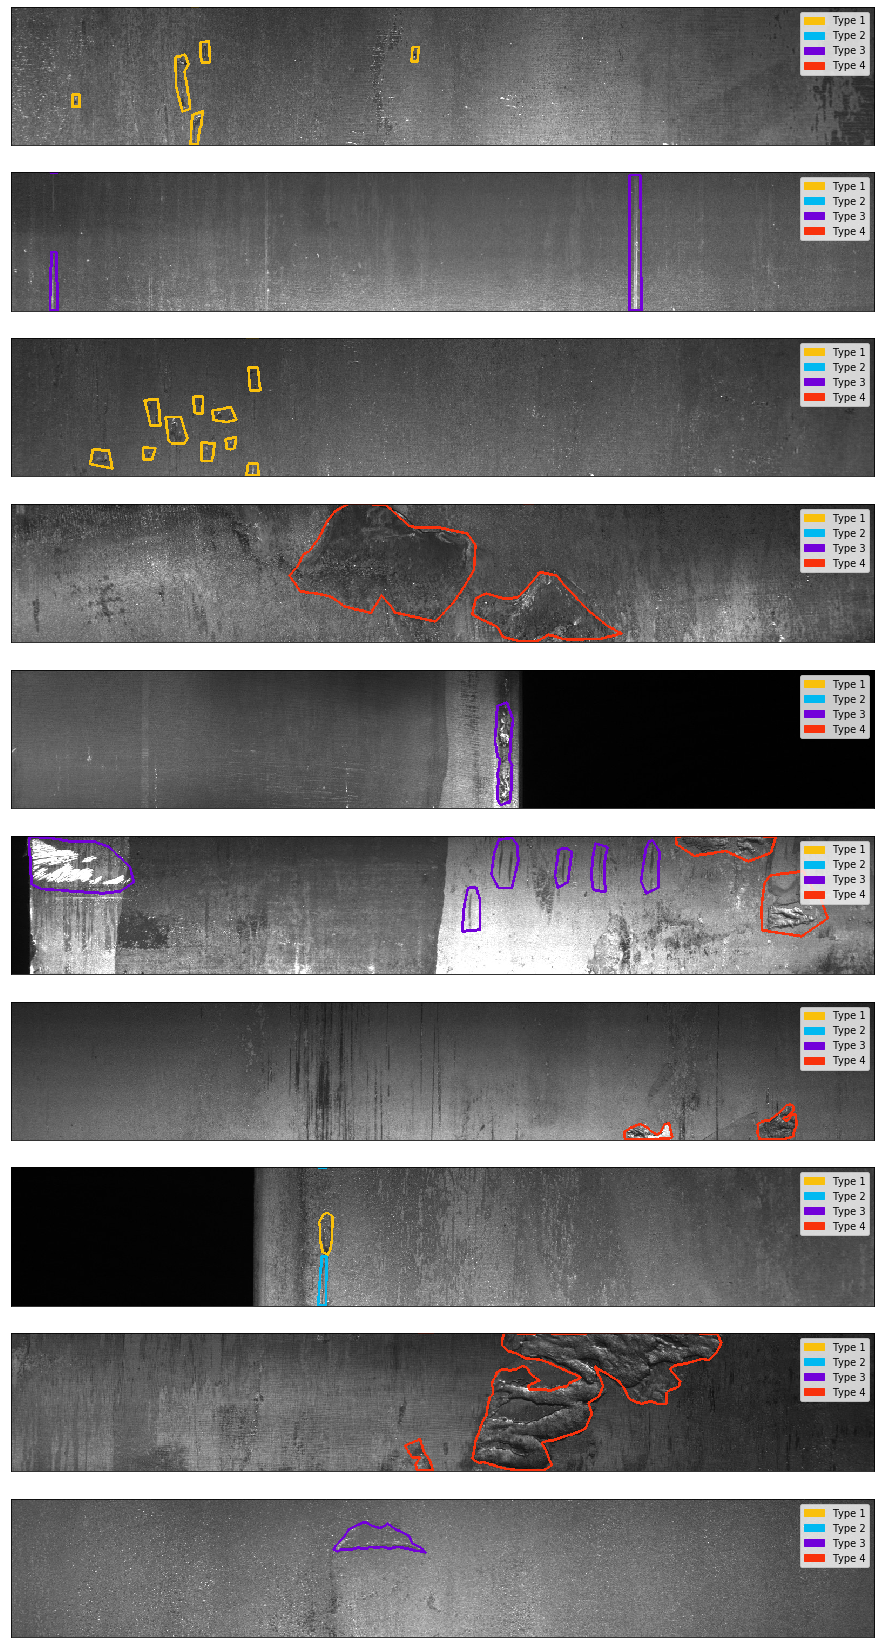

In [3]:
YELLOW = [249, 192, 12]
BLUE   = [0, 185, 241]
PURPLE = [114, 0, 218]
RED    = [249,50,12]

defects = [
    {'name': 'Type 1', 'color': YELLOW}, 
    {'name': 'Type 2', 'color': BLUE}, 
    {'name': 'Type 3', 'color': PURPLE}, 
    {'name': 'Type 4', 'color': RED}
]

legend_elements = [Patch(facecolor=np.array(d['color'])/255, 
                         edgecolor=np.array(d['color'])/255, 
                         label=d['name']) 
                   for d in defects]

NUM_SAMPLES = 10
groups = list(train.groupby('ImageId'))[:NUM_SAMPLES]

fig,axs = plt.subplots(NUM_SAMPLES, 1, figsize=(30,30))
for i, (im_name,group) in enumerate(groups):
    im_path = str(train_images_dir/im_name)
    im = cv2.imread(im_path)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    
    for _,row in group.iterrows():
        color = row['ClassId'] - 1
        mask = defects_mask(row['EncodedPixels'], im.shape)
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cv2.drawContours(im, contours, -1, defects[color]['color'], 3)
    
    axs[i].imshow(im)
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].legend(handles=legend_elements)